In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

from plotting import plot_utils, load_fits, summary_plots
from utils import roi_utils, default_paths

/home/mmhender/imstat_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load fit results

In [2]:
subjects = np.arange(1,9)
n_subjects = len(subjects)

feature_type_list_long = ['gabor_solo_ridge_12ori_8sf',\
                          # 'all_coco', \
                          'alexnet_all_conv_pca']
feature_type_list = ['gabor',
                     # 'coco', 
                     'alexnet']

n_models = len(feature_type_list)
out_list = []
for fi, fitting_type in enumerate(feature_type_list_long):

    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                      n_from_end=0, verbose=False) \
           for ss in subjects]
    out_list.append(out)
    
out = out_list
    
fig_save_folder=None

# create ROI definitions
roi_def = roi_utils.multi_subject_roi_def(subjects, remove_ret_overlap=True, \
                                          remove_categ_overlap=True)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

In [3]:
out[0][0]['val_r2'].shape

(19738, 1)

#### Plot Gabor, COCO-all, and AlexNet-concat

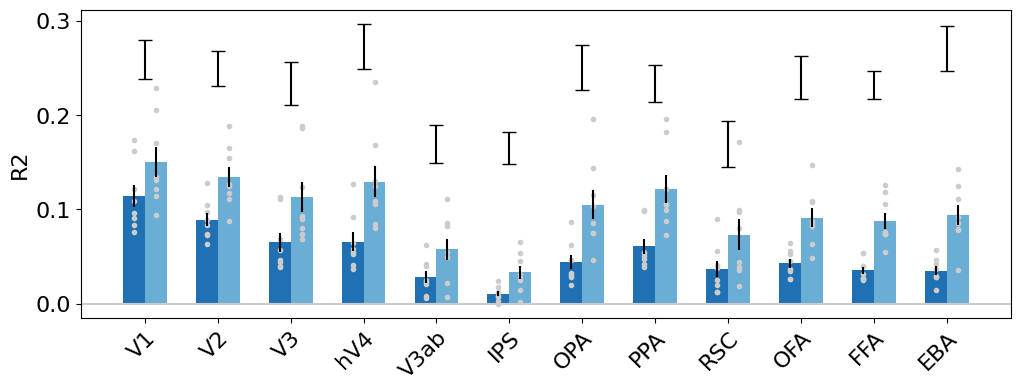

In [6]:

colors = np.flipud(cm.Blues(np.linspace(0,1,5))[2:4,:])

mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title=''
plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(fs = 16)
bw = 0.30;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                point_data=vals,\
                                colors=colors, space=space, \
                xticklabels=roi_names, ylabel='R2', \
                # ylim=[-0.01, 0.30], horizontal_line_pos=0,\
                # ylim=[0, 0.30], \
                horizontal_line_pos=0,\
                title=title, 
                legend_labels=np.array(feature_type_list)[mm2plot], \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(12,4))

nc_means = np.mean(nc_vals, axis=0)
nc_sem = np.std(nc_vals, axis=0)/np.sqrt(n_subjects)

for rr in range(n_rois):
    
    xvals = np.linspace(rr-bw*1, rr+bw*1, 3)

plt.errorbar(np.arange(n_rois), nc_means, nc_sem, \
             # color=[0.6, 0.6, 0.6], \
             color='k',
             linestyle='none', capsize=5, zorder=-10)

fn2save = os.path.join(default_paths.fig_path, 'all_models_R2.pdf')
plt.savefig(fn2save)